<a href="https://colab.research.google.com/github/coderanandmaurya/INTERNSHIP_GRIP/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARK FOUNDATION**

## **AUTHOR :ANAND MAURYA ,DATA SCIENCE & BUSINESS ANALYTICS INTERN**

- Importing the required libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [92]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


- Data Analysis

In [93]:
data.shape

(25, 2)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [95]:
data.isnull().sum() ##check for null values

Hours     0
Scores    0
dtype: int64

- observation

In [96]:
#There are -ve numbmers in experience! lets change into +ve. 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


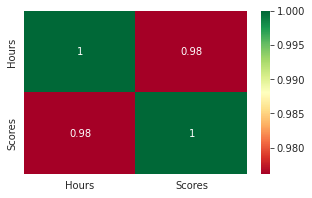

In [97]:
# Correlation with heat map
plt.figure(figsize=[5,3])
corr = sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

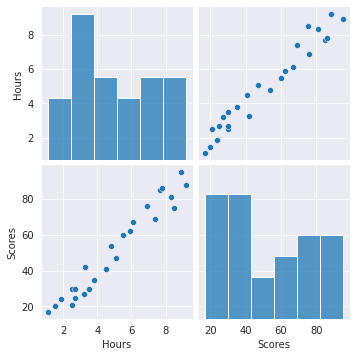

In [98]:
sns.pairplot(data)

Hours and Score have +ve correlation

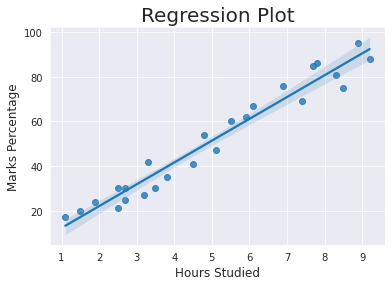

In [100]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Training the Model

In [101]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  # Separate the independent attributes and store them in X array
y = data.iloc[:, 1].values    # Store the target column into Y array

Splitting the Data

In [102]:
# Spliting the Data in two
from sklearn.model_selection import train_test_split
train_X, test_x, train_y, test_y = train_test_split(X, y, random_state = 0,test_size=0.2,)

Fitting the Data into the model

In [103]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

Accuracy of Model

In [104]:
from sklearn import metrics
model_score = regression.score(test_x, test_y)
print(model_score)

0.9454906892105354


Actual Test score

In [105]:
test_y

array([20, 27, 69, 30, 62])

Predicting Value using Regression Algo

In [106]:
pred_y = regression.predict(test_x)
pred_y

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing the Predicted Marks with the Actual Marks

In [107]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visually Comparing the Predicted Marks with the Actual Marks

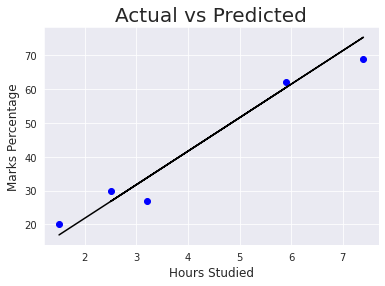

In [108]:
plt.scatter(x=test_x, y=test_y, color='blue')
plt.plot(test_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [109]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
